In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv('/kaggle/input/brand-laptops-dataset/laptops.csv')
df.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


In [3]:
df.columns

Index(['index', 'brand', 'Model', 'Price', 'Rating', 'processor_brand',
       'processor_tier', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_type', 'primary_storage_capacity',
       'secondary_storage_type', 'secondary_storage_capacity', 'gpu_brand',
       'gpu_type', 'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty'],
      dtype='object')

In [4]:
# Make names of the columns consistent
df = df.rename(columns={'Model': 'model',
                        'Price': 'price',
                        'Rating': 'rating'})
df.columns

Index(['index', 'brand', 'model', 'price', 'rating', 'processor_brand',
       'processor_tier', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_type', 'primary_storage_capacity',
       'secondary_storage_type', 'secondary_storage_capacity', 'gpu_brand',
       'gpu_type', 'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty'],
      dtype='object')

In [5]:
# Get rid of the 'index' column
df = df.drop(columns=['index'])
df.head()

,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,SSD,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,SSD,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,SSD,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,SSD,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,SSD,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


In [6]:
# Check for null values
df.isnull().sum()

brand                         0
model                         0
price                         0
rating                        0
processor_brand               0
processor_tier                0
num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_type          0
primary_storage_capacity      0
secondary_storage_type        0
secondary_storage_capacity    0
gpu_brand                     0
gpu_type                      0
is_touch_screen               0
display_size                  0
resolution_width              0
resolution_height             0
OS                            0
year_of_warranty              0
dtype: int64

In [7]:
# Check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   brand                       991 non-null    object 
 1   model                       991 non-null    object 
 2   price                       991 non-null    int64  
 3   rating                      991 non-null    int64  
 4   processor_brand             991 non-null    object 
 5   processor_tier              991 non-null    object 
 6   num_cores                   991 non-null    int64  
 7   num_threads                 991 non-null    int64  
 8   ram_memory                  991 non-null    int64  
 9   primary_storage_type        991 non-null    object 
 10  primary_storage_capacity    991 non-null    int64  
 11  secondary_storage_type      991 non-null    object 
 12  secondary_storage_capacity  991 non-null    int64  
 13  gpu_brand                   991 non

In [8]:
# Check for duplicated values
df.duplicated().sum()

0

In [9]:
# Let's explore the 'brand' feature
df['brand'].value_counts()

brand
asus         210
hp           205
lenovo       201
dell         106
msi           90
acer          89
apple         15
infinix       13
samsung        7
zebronics      7
lg             7
ultimus        6
fujitsu        5
avita          5
wings          4
chuwi          4
realme         2
microsoft      2
tecno          2
axl            2
honor          2
gigabyte       2
primebook      2
jio            1
walker         1
iball          1
Name: count, dtype: int64

In [10]:
brand_counts = df['brand'].value_counts().reset_index()
brand_counts = brand_counts.sort_values(by='count', ascending=False)

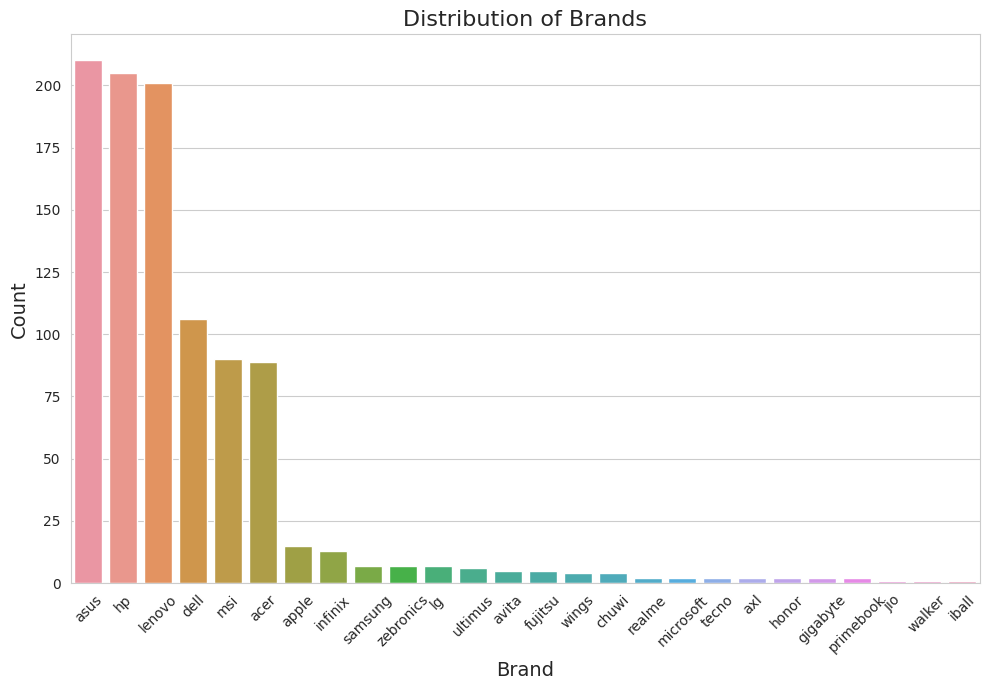

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))

sns.countplot(data=df, x='brand', order=brand_counts['brand'])

plt.title('Distribution of Brands', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [12]:
brand_stats = df.groupby('brand')['price'].agg(['mean', 'median'])

brand_stats.sort_values(by=['mean', 'median'], ascending=[False, False]).reset_index()

,brand,mean,median
0,apple,193875.333333,169900.0
1,lg,115284.714286,117899.0
2,dell,101701.132075,69494.5
3,msi,94260.433333,71490.0
4,microsoft,88740.000000,88740.0
5,fujitsu,82890.800000,73990.0
6,gigabyte,80990.000000,80990.0
7,asus,78290.223810,69839.5
8,hp,76005.604878,60999.0
9,samsung,67990.000000,64990.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


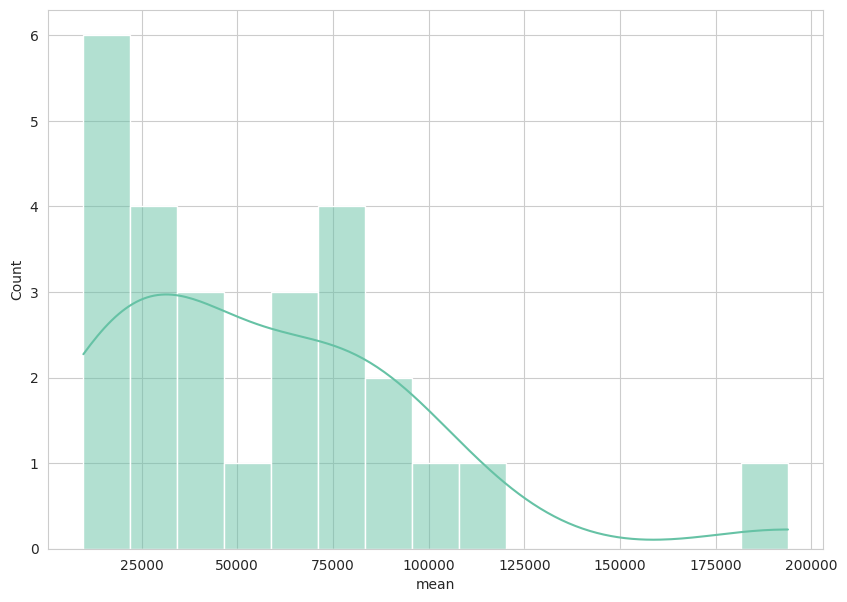

In [13]:
sns.set_palette('Set2')
plt.figure(figsize=(10, 7))

sns.histplot(brand_stats['mean'], bins=15, kde=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


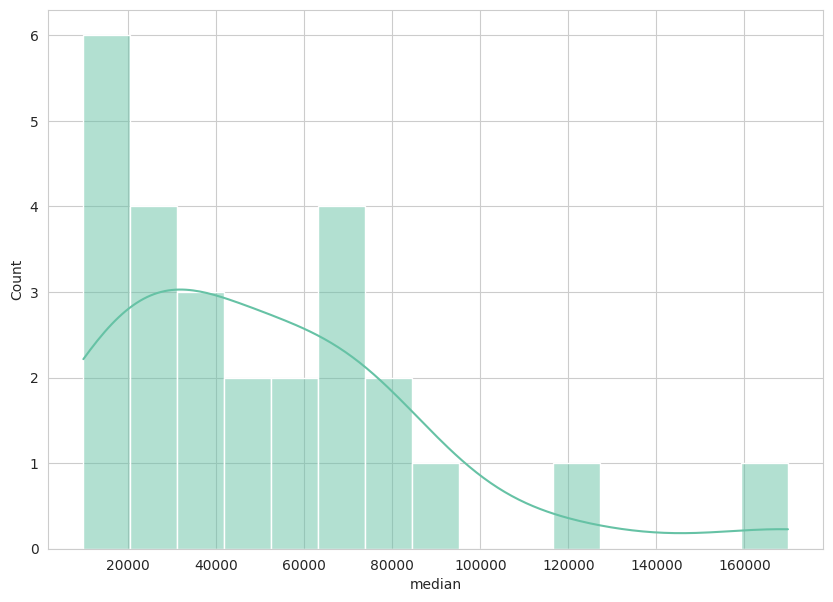

In [14]:
plt.figure(figsize=(10, 7))

sns.histplot(brand_stats['median'], bins=15, kde=True)
plt.show()

In [15]:
# let's explore the 'model' feature
len(df['model'].unique())

991

In [16]:
df['model']

0      Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...
1      Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...
2      HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...
3      Acer Extensa EX214-53 Laptop (12th Gen Core i5...
4      Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...
                             ...                        
986    Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...
987    MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...
988    Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...
989    Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...
990    HP Chromebook 15a-na0008TU Laptop (Intel Celer...
Name: model, Length: 991, dtype: object

In [17]:
# Let's explore the 'price' column
df['price'].describe()

count       991.000000
mean      77266.504541
std       57384.910269
min        9800.000000
25%       43595.000000
50%       61900.000000
75%       89245.000000
max      454490.000000
Name: price, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


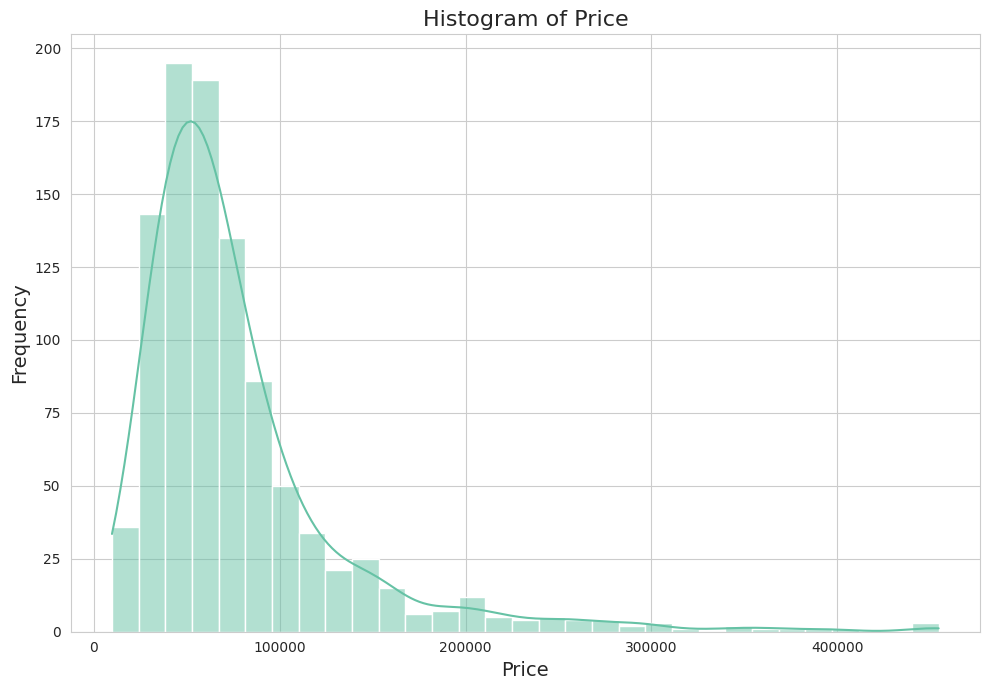

In [18]:
plt.figure(figsize=(10, 7))

sns.histplot(df['price'], bins=round(np.sqrt(len(df))), kde=True)
plt.title('Histogram of Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

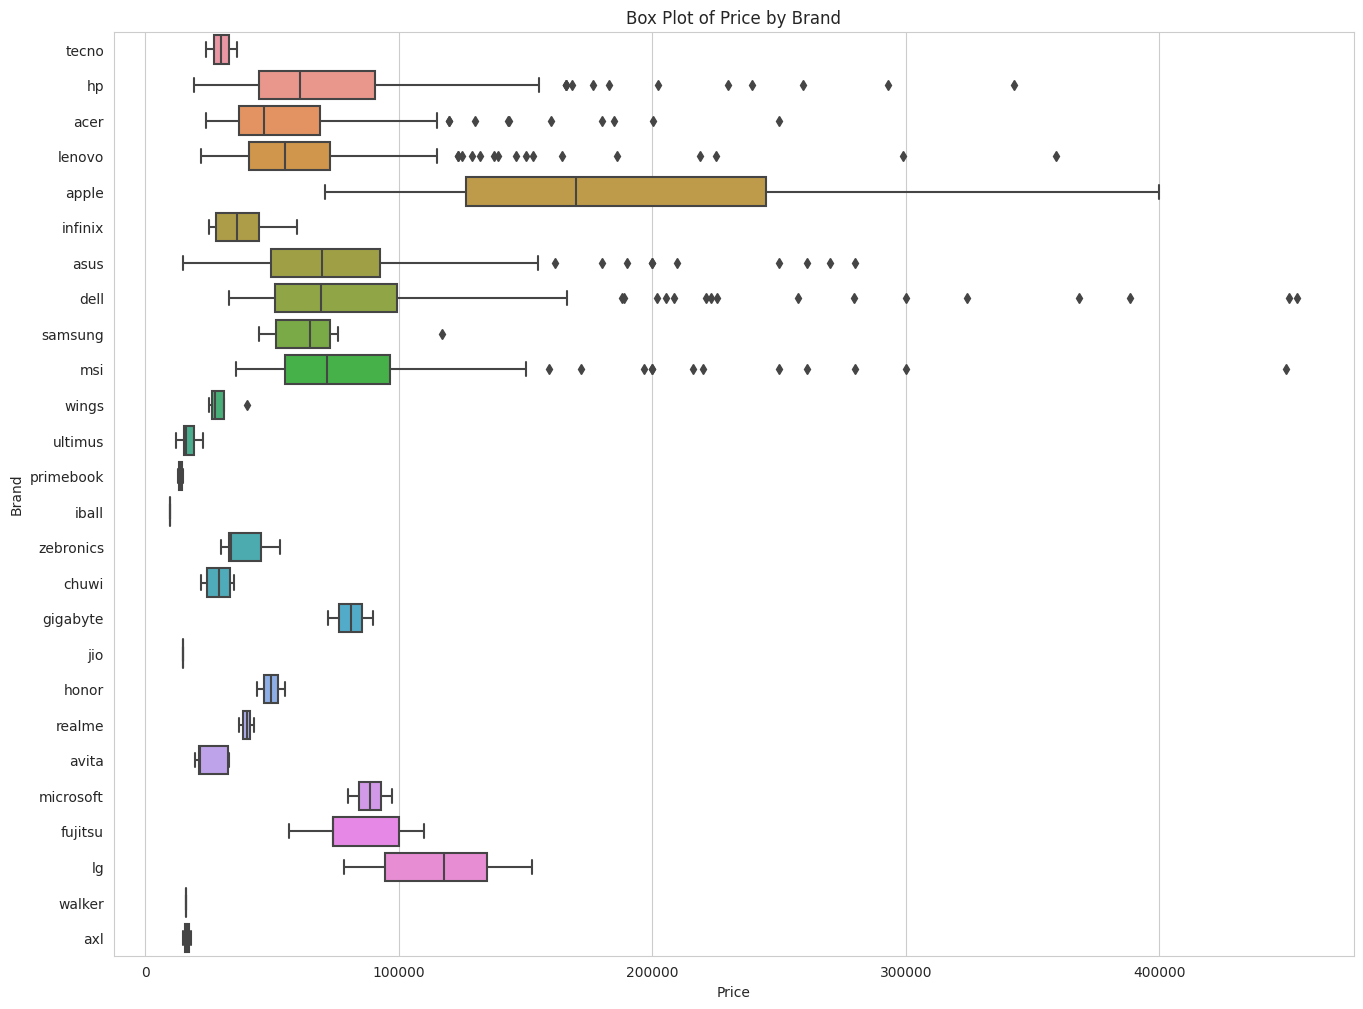

In [19]:
plt.figure(figsize=(16, 12))

sns.boxplot(data=df, x='price', y='brand')
plt.xlabel('Price')
plt.ylabel('Brand')
plt.title('Box Plot of Price by Brand')

plt.show()

In [20]:
# Let's check out the outliers in 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

upper_bound, lower_bound

(157720.0, -24880.0)

Since the lower bound is negative, I am not gonna use it to find outliers (as we are dealing with prices)

In [21]:
price_outliers = df.query('price > @upper_bound')
price_outliers

,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
22,apple,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max...,399900,65,apple,m3,16,16,8,SSD,...,No secondary storage,0,apple,apple,False,16.2,3456,2234,mac,1
47,asus,Asus ROG Strix SCAR 16 2023 G634JZ-NM057WS Gam...,269990,83,intel,core i9,24,32,32,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,1
136,hp,HP Spectre x360 16-aa0665TU Laptop (Intel Core...,202340,82,intel,core ultra 7,16,22,32,SSD,...,No secondary storage,0,intel,dedicated,True,16.0,2880,1800,windows,1
140,hp,HP Spectre x360 14-eu0666TU Laptop (Intel Core...,165900,76,intel,core ultra 7,16,22,32,SSD,...,No secondary storage,0,intel,dedicated,True,14.0,2880,1800,windows,1
141,apple,Apple MacBook Pro 16 2023 Laptop (Apple M3 Pro...,289900,63,apple,m3,12,12,36,SSD,...,No secondary storage,0,apple,apple,False,16.2,3456,2234,mac,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,msi,MSI Stealth 14 Studio A13VF-037IN Gaming Lapto...,171990,80,intel,core i7,14,20,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,15.6,2560,1600,windows,2
928,acer,Acer Predator Helios 16 NH.QJRSI.003 Laptop (1...,184999,71,intel,core i9,24,32,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,1
929,acer,Acer Predator Helios 16 Laptop (13th Gen Core ...,249990,77,intel,core i9,24,32,32,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,1
957,asus,Asus ROG Zephyrus M16 2023 GU604VZ-NM050WS Lap...,249990,89,intel,core i9,14,20,32,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,1


In [22]:
price_outliers['brand'].value_counts().reset_index()

,brand,count
0,dell,18
1,hp,12
2,msi,12
3,asus,10
4,apple,8
5,lenovo,6
6,acer,5


In [23]:
price_outliers.query('brand == "dell"')['price']

292    208490
522    223275
595    257490
601    454490
603    323990
604    188990
608    450990
619    299990
720    279490
721    201990
738    205490
755    157990
756    166490
787    187990
819    225490
820    220990
845    388490
847    368490
Name: price, dtype: int64

In [24]:
pd.set_option('display.max_rows', len(price_outliers))
price_outliers[['brand', 'price']].sort_values(by='price', ascending=False).reset_index()

,index,brand,price
0,601,dell,454490
1,608,dell,450990
2,404,msi,449990
3,22,apple,399900
4,845,dell,388490
5,847,dell,368490
6,340,lenovo,359095
7,142,apple,349900
8,369,hp,342500
9,603,dell,323990


In [25]:
# Let's explore the 'rating' column
df['rating'].max(), df['rating'].min(), df['rating'].mean(), df['rating'].median()

(89, 24, 63.9313824419778, 64.0)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


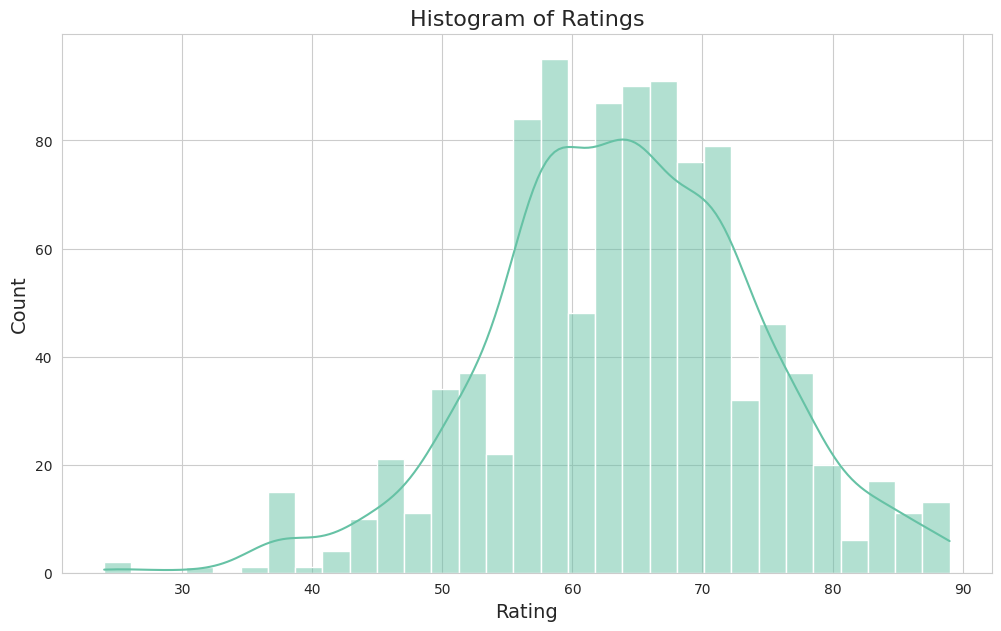

In [26]:
plt.figure(figsize=(12, 7))

sns.histplot(data=df, x='rating', bins=round(np.sqrt(len(df))), kde=True)
plt.title('Histogram of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

In [27]:
rating_stats = df.groupby('brand')['rating'].agg(['mean', 'median'])
rating_stats = rating_stats.sort_values(by=['mean', 'median'], ascending=[False, False]).reset_index()

rating_stats

,brand,mean,median
0,lg,72.142857,72.0
1,msi,70.888889,71.0
2,fujitsu,70.200000,70.0
3,gigabyte,70.000000,70.0
4,asus,65.438095,66.0
5,tecno,65.000000,65.0
6,zebronics,64.857143,65.0
7,dell,64.603774,62.0
8,hp,64.492683,66.0
9,lenovo,62.552239,62.0


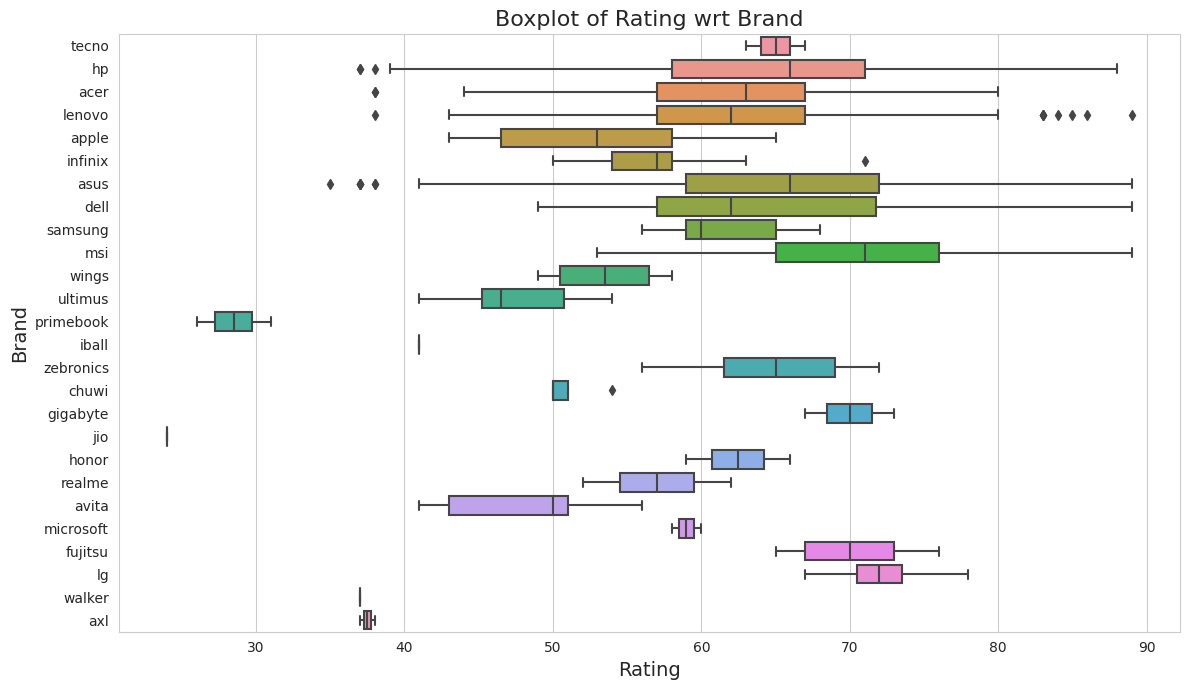

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='rating', y='brand')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.title('Boxplot of Rating wrt Brand', fontsize=16)
plt.tight_layout()
plt.show()

In [29]:
# Let's explore the 'processor_brand' column
df['processor_brand'].value_counts()

processor_brand
intel    705
amd      267
apple     15
other      4
Name: count, dtype: int64

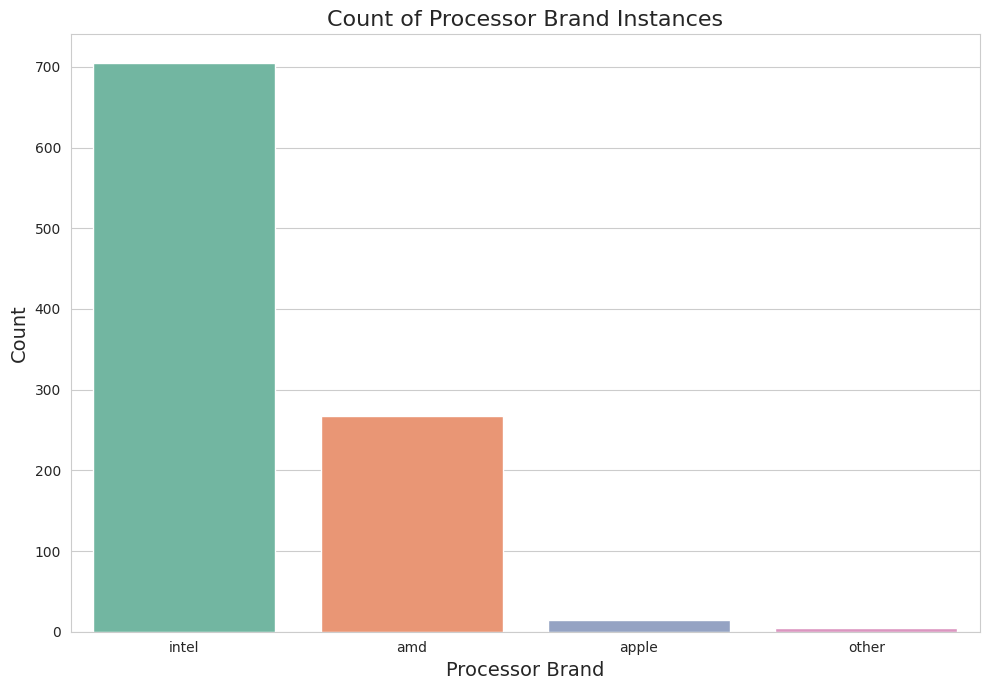

In [30]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='processor_brand')
plt.title('Count of Processor Brand Instances', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Processor Brand', fontsize=14)
plt.tight_layout()
plt.show()

In [31]:
processor_brand_stats = df.groupby('processor_brand')['price'].agg(['mean', 'median'])
processor_brand_stats = processor_brand_stats.sort_values(by=['mean', 'median'], 
                                                          ascending=[False, False])

processor_brand_stats

,mean,median
processor_brand,,
apple,193875.333333,169900.0
intel,79789.222695,62990.0
amd,64903.902622,56490.0
other,20558.000000,14845.5


In [32]:
# Let's explore the 'processor_tier' column
df['processor_tier'].value_counts().reset_index()

,processor_tier,count
0,core i5,335
1,core i7,159
2,ryzen 5,139
3,core i3,127
4,ryzen 7,77
5,celeron,40
6,core i9,37
7,ryzen 3,31
8,other,14
9,ryzen 9,12


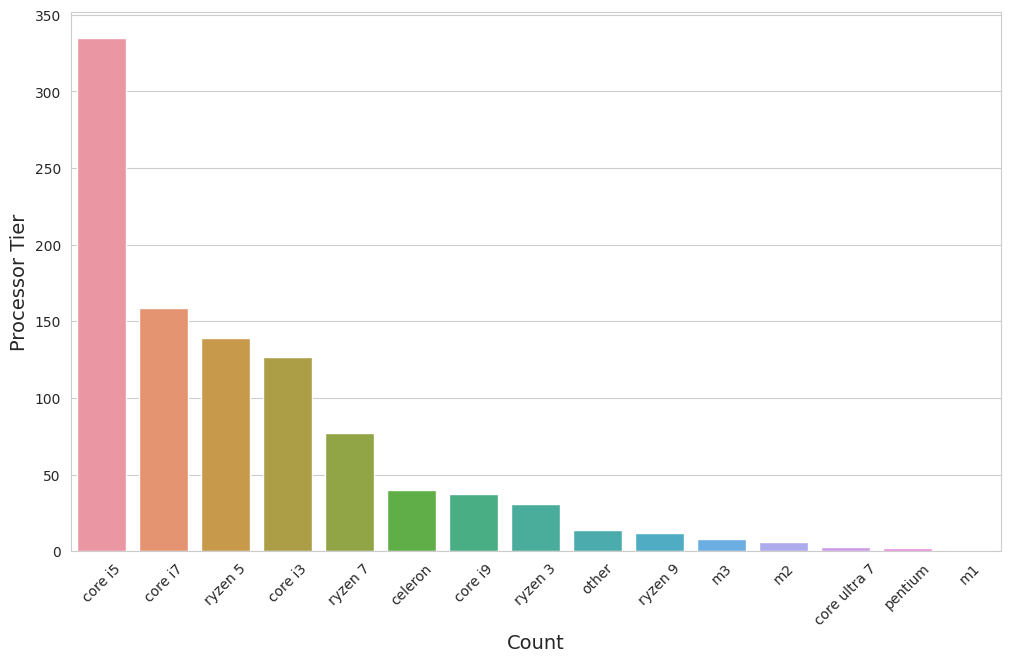

In [33]:
plt.figure(figsize=(12, 7))

sns.countplot(data=df, x='processor_tier', order=df['processor_tier'].value_counts().reset_index()['processor_tier'])
plt.xlabel('Count', fontsize=14)
plt.ylabel('Processor Tier', fontsize=14)
plt.xticks(rotation=45)

plt.show()

In [34]:
processor_tier_stats = df.groupby('processor_tier')['price'].agg(['mean', 'median'])
processor_tier_stats = processor_tier_stats.sort_values(by=['mean', 'median'],
                                                        ascending=[False, False])

processor_tier_stats.reset_index()

,processor_tier,mean,median
0,m3,261150.000000,244900.0
1,core i9,236658.810811,209890.0
2,core ultra 7,178046.666667,165900.0
3,ryzen 9,165071.666667,142490.0
4,m2,124656.666667,126490.0
5,core i7,117426.295597,105990.0
6,ryzen 7,86739.025974,79970.0
7,m1,70990.000000,70990.0
8,core i5,66845.158209,63990.0
9,ryzen 5,53927.654676,51990.0


In [35]:
# Let's explore the 'num_cores' column
df['num_cores'].describe()

count    991.000000
mean       8.128153
std        4.215499
min        2.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       24.000000
Name: num_cores, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


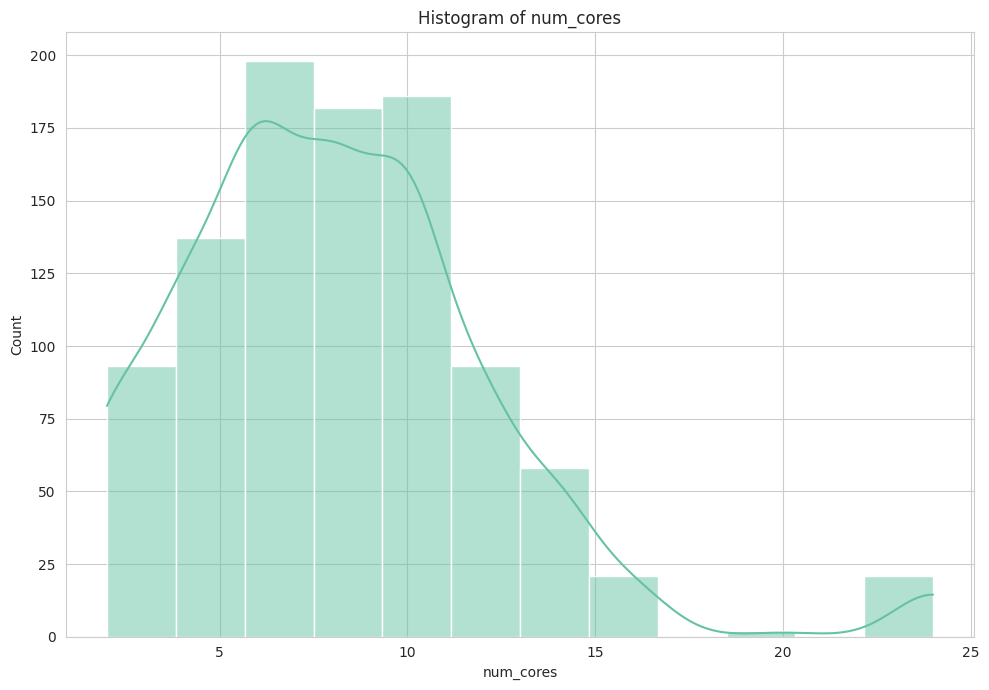

In [36]:
plt.figure(figsize=(10, 7))

sns.histplot(data=df, x='num_cores', bins=12, kde=True)
plt.title('Histogram of num_cores')
plt.tight_layout()

plt.show()

In [37]:
df['num_cores'].unique(), len(df['num_cores'].unique())

(array([ 2,  4,  6, 12,  8, 14, 20, 10, 16, 24,  5, 11]), 12)

My intuition says that greater the number of cores, greater would be the price of the laptop. Let's check it!

In [38]:
df['num_cores'].corr(df['price'])

0.7244554536912874

OK, that correlation is pretty high. So **num_cores** would potentially turn out to be a great feature, provided it does not have a high correlation with any other feature(s).

There are 991 unique rows in the dataframe and only 12 unique values in df['num_cores']. So grouping the dataframe by 'num_cores' sounds good to me.

In [39]:
num_cores_stats = df.groupby('num_cores')['price'].agg(['mean', 'median'])
num_cores_stats = num_cores_stats.sort_values(by=['mean', 'median'],
                                              ascending=[False, False])

num_cores_stats.reset_index()

,num_cores,mean,median
0,24,264701.523810,260990.0
1,11,199900.000000,199900.0
2,16,178448.428571,165900.0
3,20,165244.500000,165244.5
4,14,158735.155172,131294.5
5,12,96285.559140,84990.0
6,8,82441.791209,72990.0
7,10,78694.405405,67400.0
8,5,56970.250000,43990.0
9,6,51873.328283,50990.0


In [40]:
# I wonder what's so good about those 11 core laptops?
df.query('num_cores == 11')

,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
144,apple,Apple MacBook Pro 14 2023 Laptop (Apple M3 Pro...,199900,56,apple,m3,11,11,8,SSD,...,No secondary storage,0,apple,apple,False,14.2,3024,1964,mac,1


OK, so there's only one 11-core laptop in our dataset. Not enough to make something of. Let's check for other laptops having greater prices for lower number of cores.

In [41]:
df.query('num_cores == 16')

,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
22,apple,Apple MacBook Pro 16 2023 Laptop (Apple M3 Max...,399900,65,apple,m3,16,16,8,SSD,...,No secondary storage,0,apple,apple,False,16.2,3456,2234,mac,1
56,hp,HP Omen 16-u0005TX Gaming Laptop (13th Gen Cor...,147990,80,intel,core i7,16,24,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.1,2560,1600,windows,1
117,acer,Acer Predator Helios Neo 16 PHN16-71 Laptop (1...,119990,75,intel,core i7,16,24,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.0,1920,1200,windows,1
136,hp,HP Spectre x360 16-aa0665TU Laptop (Intel Core...,202340,82,intel,core ultra 7,16,22,32,SSD,...,No secondary storage,0,intel,dedicated,True,16.0,2880,1800,windows,1
140,hp,HP Spectre x360 14-eu0666TU Laptop (Intel Core...,165900,76,intel,core ultra 7,16,22,32,SSD,...,No secondary storage,0,intel,dedicated,True,14.0,2880,1800,windows,1
145,lenovo,Lenovo Legion Pro 5 16IRX8 82WK00MWIN Gaming L...,152990,77,intel,core i7,16,24,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,1
155,hp,HP Spectre x360 14-eu0556TU Laptop (Intel Core...,165900,76,intel,core ultra 7,16,22,32,SSD,...,No secondary storage,0,intel,dedicated,True,14.0,2880,1800,windows,1
235,acer,Acer Predator Helios Neo 16 PHN16-71 Gaming La...,119990,75,intel,core i7,16,24,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.0,1920,1200,windows,1
348,msi,MSI Vector GP68 HX 13VG-214IN Gaming Laptop (1...,199990,80,intel,core i7,16,24,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.0,2560,1600,windows,1
379,hp,HP Omen 17-ck2008AX Gaming Laptop (13th Gen Co...,259499,85,intel,core i7,16,24,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,17.3,2560,1440,windows,1


In [42]:
df.query('num_cores == 20')

,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
15,hp,HP Omen 16-wf1025TX Gaming Laptop (14th Gen Co...,153990,85,intel,core i7,20,28,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.1,2560,1440,windows,1
191,hp,HP Omen 16-wf1026TX Gaming Laptop (14th Gen Co...,176499,85,intel,core i7,20,28,16,SSD,...,No secondary storage,0,nvidia,dedicated,False,16.1,2560,1440,windows,1


Hmmm, we have got only 2 20-core laptops and 21 16-core laptops. So we don't have enough 20-core laptops in the dataset to make a reliable statement on it's effect on price.

In [43]:
# Let's explore the 'num_threads' column
df['num_threads'].describe()

count    991.000000
mean      12.191726
std        5.585115
min        0.000000
25%        8.000000
50%       12.000000
75%       16.000000
max       32.000000
Name: num_threads, dtype: float64

In [44]:
num_threads_counts = df['num_threads'].value_counts().reset_index().sort_values(by='num_threads',
                                                                                ascending=True)
num_threads_counts

,num_threads,count
9,0,5
5,2,46
4,4,53
14,5,1
8,6,7
2,8,207
13,11,1
0,12,351
12,14,1
1,16,220


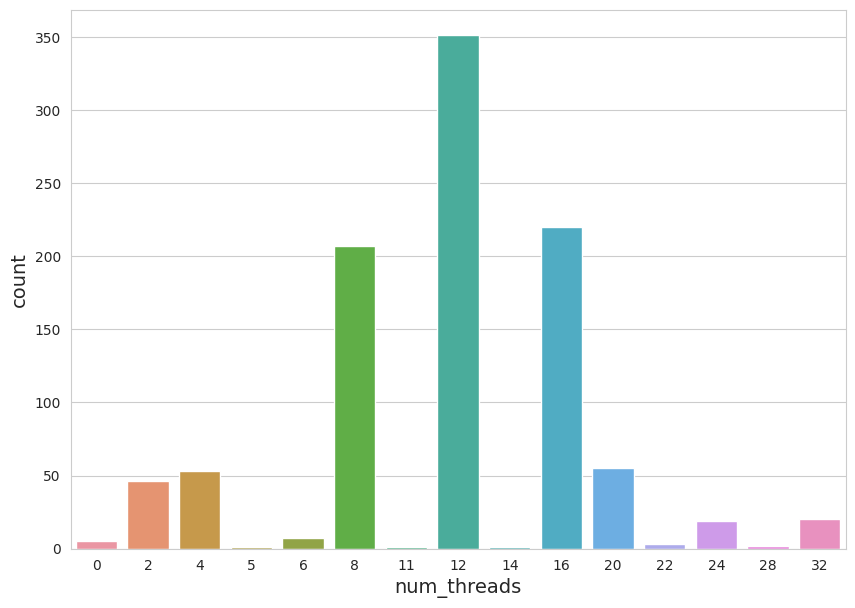

In [45]:
plt.figure(figsize=(10, 7))

sns.countplot(data=df, x='num_threads', order=num_threads_counts['num_threads'])
plt.xlabel('num_threads', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.show()

In [46]:
# I am guessing greater the number of threads, greater would be the price of the laptop
df['num_threads'].corr(df['price'])

0.7195288113719226

In [47]:
df['num_threads'].corr(df['num_cores'])

0.907461099734665

Oh no! 'num_threads' and 'num_cores' are highly correlated. When building a model, I need to get rid of one of them (num_threads, as it has lower correlation with price).

In [48]:
len(df['ram_memory'].unique())

7

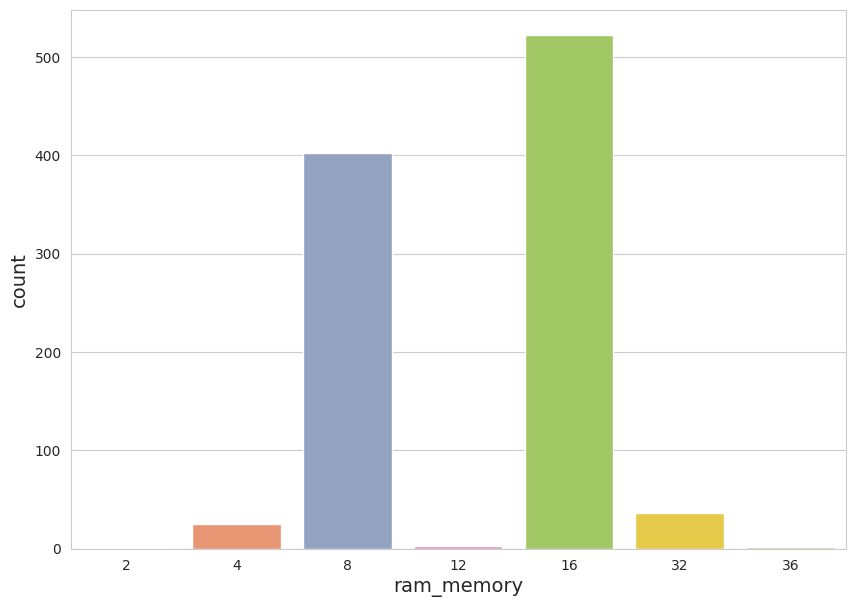

In [49]:
plt.figure(figsize=(10, 7))

sns.countplot(data=df, x='ram_memory')
plt.ylabel('count', fontsize=14)
plt.xlabel('ram_memory', fontsize=14)

plt.show()

In [50]:
ram_stats = df.groupby('ram_memory')['price'].agg(['mean', 'median']).reset_index()
ram_stats = ram_stats.sort_values(by=['mean', 'median'],
                                  ascending=[False, False])
ram_stats

,ram_memory,mean,median
6,36,319900.000000,319900.0
5,32,240932.000000,244644.5
4,16,87732.927203,76804.5
1,4,53641.600000,19299.0
2,8,49675.014925,43862.5
3,12,46990.000000,46990.0
0,2,9800.000000,9800.0


In [51]:
for i in df['ram_memory'].sort_values().unique():
    print(f"Number of laptops with ram_memory = {i}: {len(df.query('ram_memory == @i'))}")

Number of laptops with ram_memory = 2: 1
Number of laptops with ram_memory = 4: 25
Number of laptops with ram_memory = 8: 402
Number of laptops with ram_memory = 12: 3
Number of laptops with ram_memory = 16: 522
Number of laptops with ram_memory = 32: 36
Number of laptops with ram_memory = 36: 2


These numbers help explain ram_stats.

In [52]:
# Time to check out the correlation between 'ram_memory' and 'price'
df['ram_memory'].corr(df['price'])

0.6331235783715713

In [53]:
# Let's explore the 'primary_storage_type' column
df['primary_storage_type'].value_counts()

primary_storage_type
SSD    964
HDD     27
Name: count, dtype: int64

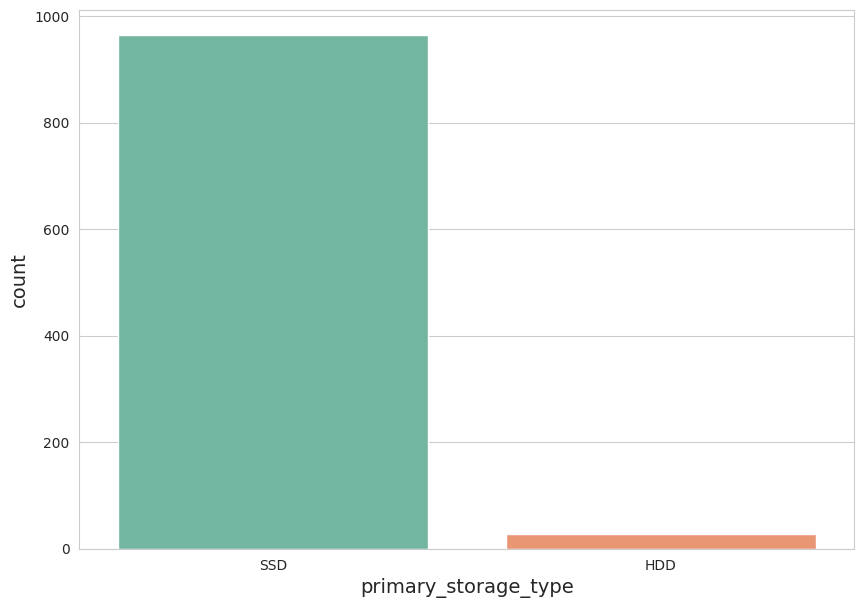

In [54]:
plt.figure(figsize=(10, 7))

sns.countplot(data=df, x='primary_storage_type')
plt.xlabel('primary_storage_type', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.show()

In [55]:
primary_storage_type = df.groupby('primary_storage_type')['price'].agg(['mean', 'median']).reset_index().sort_values(by=['mean', 'median'],
                                                                                                                     ascending=[False, False])
primary_storage_type

,primary_storage_type,mean,median
1,SSD,78133.336100,61990.0
0,HDD,46317.407407,34890.0


In [56]:
# Let's explore the primary_storage_capacity 
df['primary_storage_capacity'].value_counts()

primary_storage_capacity
512     708
1024    208
256      45
128      11
64        9
2048      8
32        2
Name: count, dtype: int64

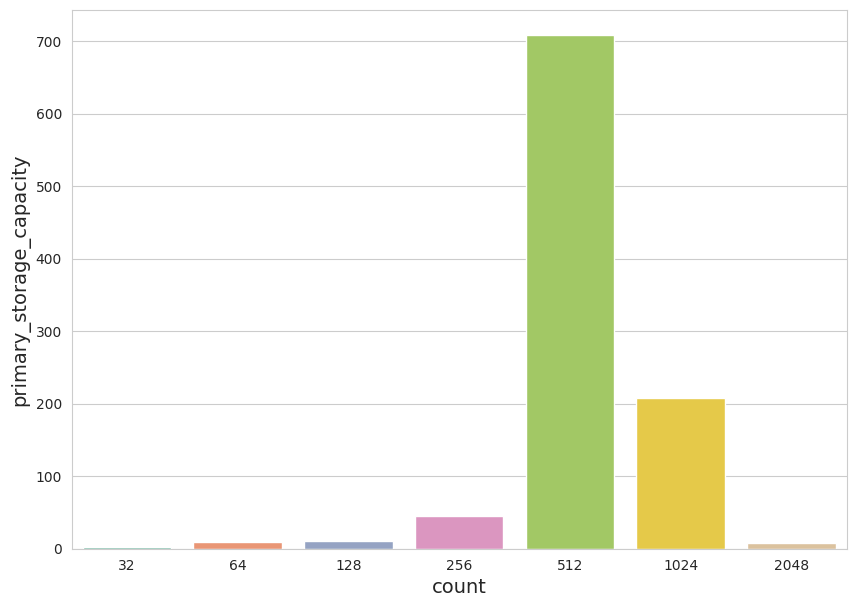

In [57]:
plt.figure(figsize=(10, 7))

sns.countplot(data=df, x='primary_storage_capacity')
plt.xlabel('count', fontsize=14)
plt.ylabel('primary_storage_capacity', fontsize=14)

plt.show()

In [58]:
primary_storage_capacity_stats = df.groupby('primary_storage_capacity')['price'].agg(['mean', 'median']).reset_index().sort_values(by=['mean', 'median'],
                                                                                                                                   ascending=[False, False])
primary_storage_capacity_stats

,primary_storage_capacity,mean,median
6,2048,307097.375000,286494.5
5,1024,132188.524038,109590.0
4,512,62780.728814,56790.0
3,256,38461.133333,27990.0
2,128,21675.818182,20990.0
1,64,19598.111111,17990.0
0,32,12395.000000,12395.0


In [59]:
df['primary_storage_capacity'].corr(df['price'])

0.6363428610573059

In [60]:
df.columns

Index(['brand', 'model', 'price', 'rating', 'processor_brand',
       'processor_tier', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_type', 'primary_storage_capacity',
       'secondary_storage_type', 'secondary_storage_capacity', 'gpu_brand',
       'gpu_type', 'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty'],
      dtype='object')

In [61]:
# Let's explore the secondary_storage_capacity column
df.secondary_storage_capacity.value_counts()

secondary_storage_capacity
0      976
256     13
128      1
512      1
Name: count, dtype: int64

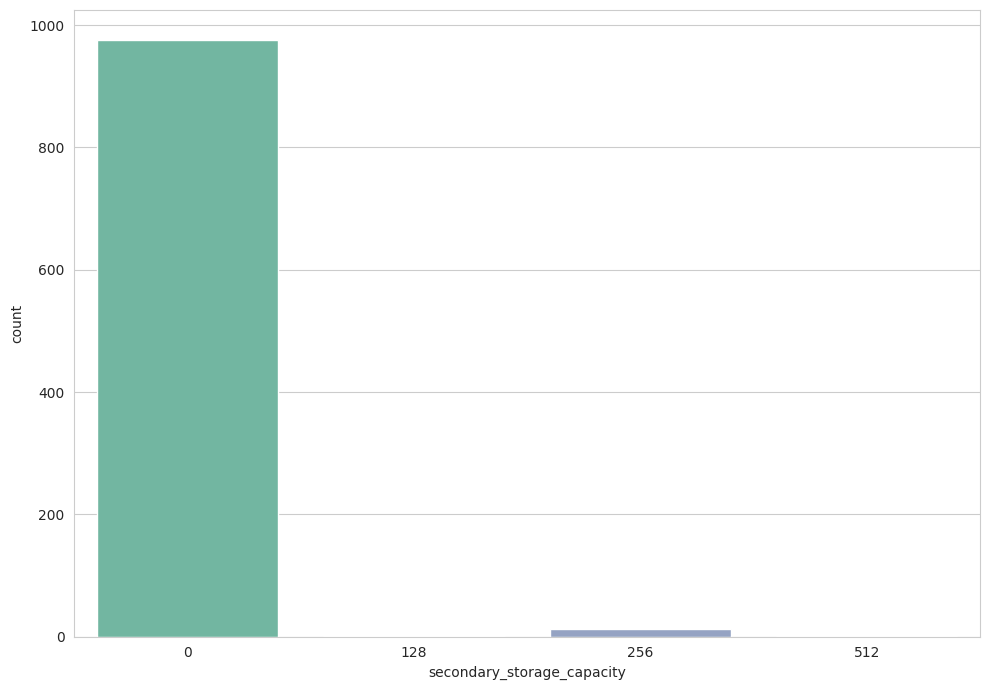

In [62]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='secondary_storage_capacity')
plt.tight_layout()
plt.show()

In [63]:
# Let's check the correlation of this column with the price
df['secondary_storage_capacity'].corr(df['price'])

-0.013603505139510226

So it's not a very useful feature.

In [64]:
secondary_storage_capacity_stats = df.groupby('secondary_storage_capacity')['price'].agg(['mean', 'median']).reset_index().sort_values(by=['mean', 'median'],
                                                                                                                                       ascending=[False, False])
secondary_storage_capacity_stats 

,secondary_storage_capacity,mean,median
3,512,115706.000000,115706.0
0,0,77436.455943,61595.0
2,256,65571.461538,66350.0
1,128,24990.000000,24990.0


In [65]:
# Let's explore the gpu_brand column
df['gpu_brand'].value_counts().reset_index()

,gpu_brand,count
0,intel,462
1,nvidia,343
2,amd,167
3,apple,15
4,arm,4


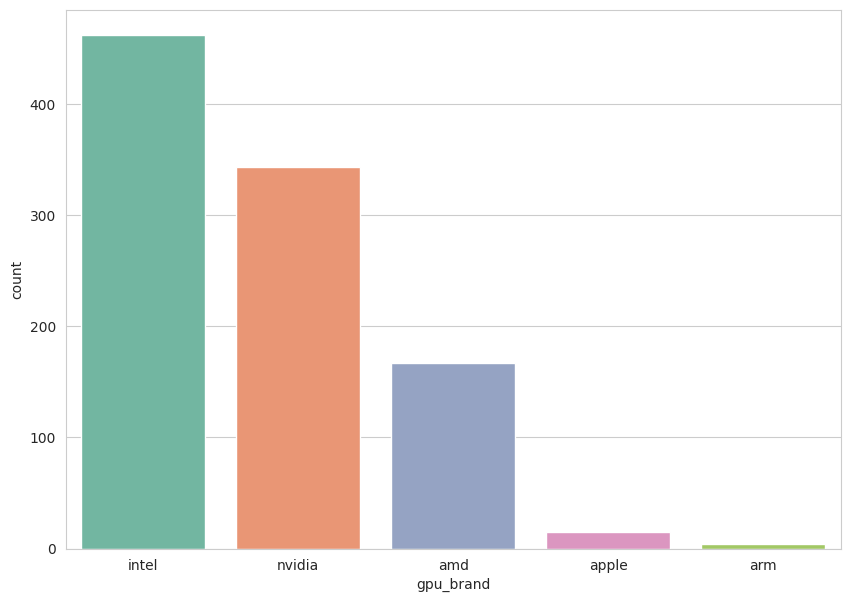

In [66]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='gpu_brand', order=df['gpu_brand'].value_counts().reset_index().sort_values(by='count', ascending=False)['gpu_brand'])
plt.show()

In [67]:
gpu_brand_stats = df.groupby('gpu_brand')['price'].agg(['mean', 'median']).reset_index().sort_values(by=['mean', 'median'],
                                                                                                     ascending=[False, False])
gpu_brand_stats

,gpu_brand,mean,median
1,apple,193875.333333,169900.0
4,nvidia,112181.895044,89000.0
3,intel,58547.950216,51643.5
0,amd,48222.760479,44990.0
2,arm,20558.000000,14845.5


In [68]:
# Let's explore the gpu_type column
df['gpu_type'].value_counts()

gpu_type
integrated    616
dedicated     360
apple          15
Name: count, dtype: int64

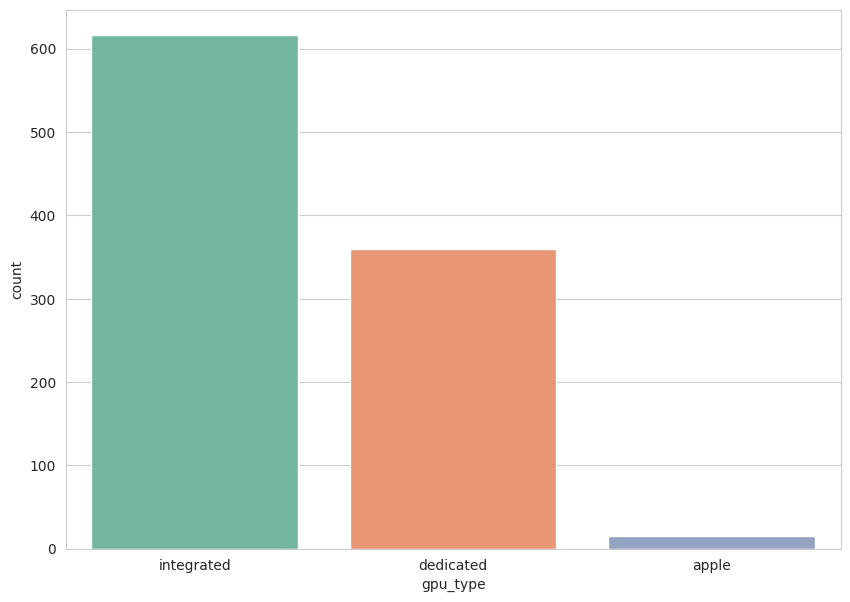

In [69]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='gpu_type')
plt.show()

In [70]:
gpu_type_stats = df.groupby('gpu_type')['price'].agg(['mean', 'median']).reset_index().sort_values(by=['mean', 'median'],
                                                                                                   ascending=[False, False])
gpu_type_stats

,gpu_type,mean,median
0,apple,193875.333333,169900.0
1,dedicated,110707.494444,87990.0
2,integrated,54883.568182,47990.0


In [71]:
# Let's explore the is_touch_screen column
df['is_touch_screen'].value_counts()

is_touch_screen
False    903
True      88
Name: count, dtype: int64

In [72]:
df.query('is_touch_screen == False')['price'].mean(), df.query('is_touch_screen == False')['price'].median()

(75084.5415282392, 58990.0)

In [73]:
df.query('is_touch_screen == True')['price'].mean(), df.query('is_touch_screen == True')['price'].median()

(99656.42045454546, 87840.0)

In [74]:
# Let's explore the display_size column
df['display_size'].value_counts()

display_size
15.6    527
14.0    237
16.0    118
16.1     26
13.3     19
17.3     15
14.1      9
13.4      7
11.6      7
13.5      5
16.2      4
14.2      4
12.4      2
18.0      2
14.5      2
15.3      2
13.6      2
10.1      1
15.0      1
13.0      1
Name: count, dtype: int64

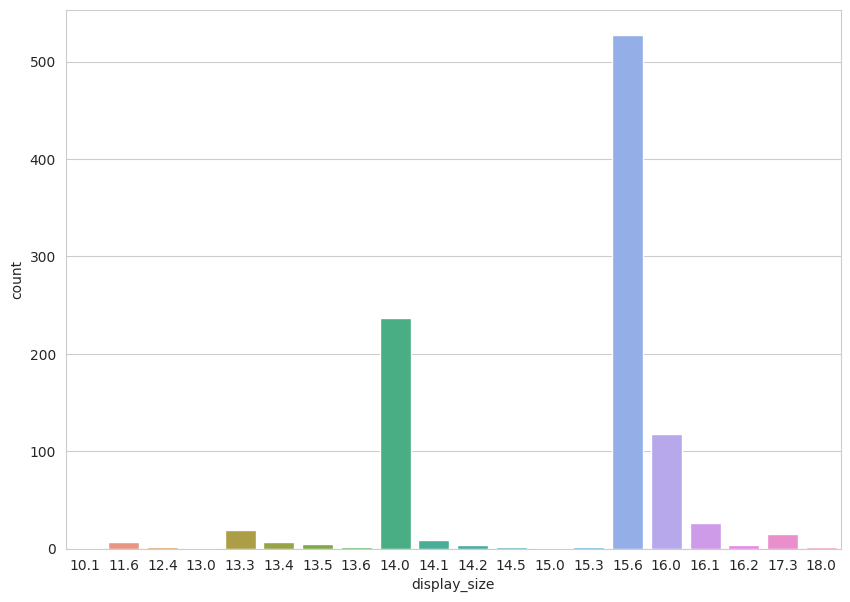

In [75]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='display_size')
plt.show()

In [76]:
df['display_size'].corr(df['price'])

0.21143538212870683

In [77]:
# Let's explore the resolution_width column
df['resolution_width'].value_counts()

resolution_width
1920    776
2560     81
1366     52
2880     37
3200      8
1080      7
3456      6
3024      4
3000      4
1200      3
3840      2
2160      2
1536      2
1440      1
2048      1
2256      1
1280      1
1600      1
2240      1
3072      1
Name: count, dtype: int64

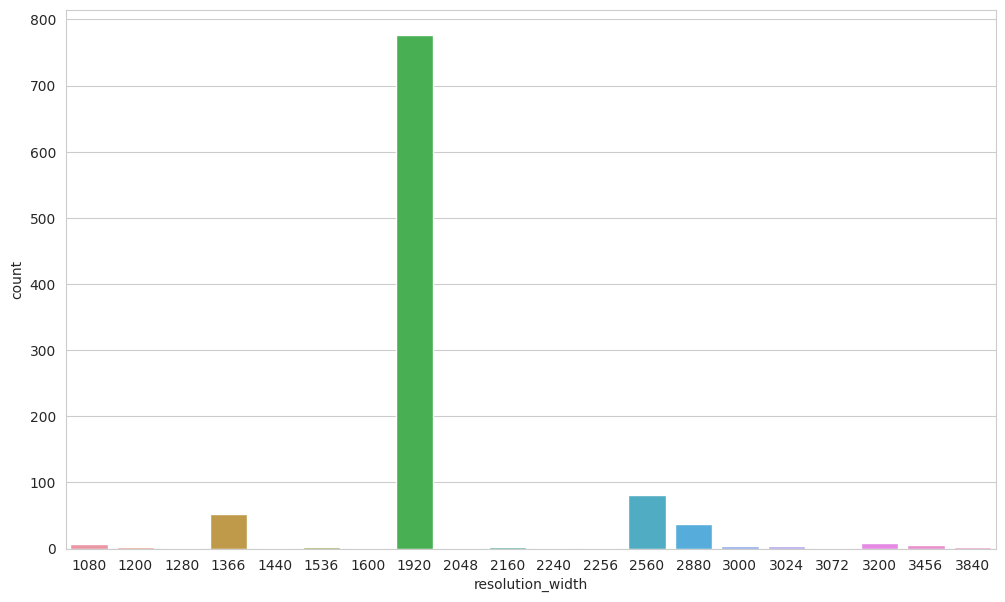

In [78]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='resolution_width')
plt.show()

In [79]:
df['resolution_width'].corr(df['price'])

0.6403063133740216

In [80]:
# Let's explore the resolution_height column
df['resolution_height'].value_counts()

resolution_height
1080    648
1200    128
1600     64
768      52
1800     34
1440     16
1920     10
2000      7
1620      6
1964      4
2234      4
2160      3
1024      3
1864      2
1664      2
2400      2
1504      1
1660      1
800       1
1536      1
2560      1
1400      1
Name: count, dtype: int64

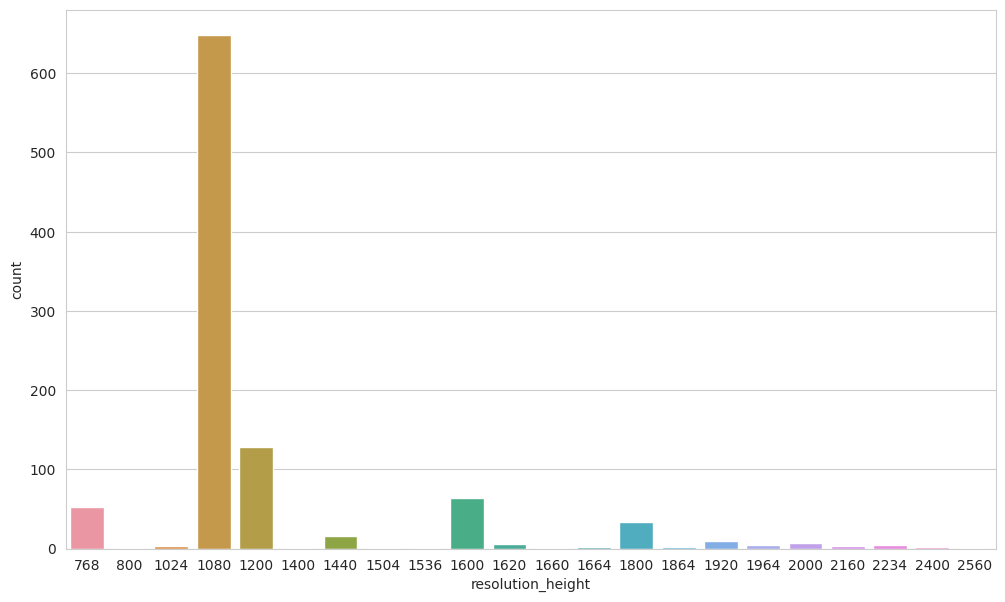

In [81]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='resolution_height')
plt.show()

In [82]:
# Let's explore the OS column
df['OS'].value_counts()

OS
windows    924
dos         32
chrome      16
mac         15
other        2
android      1
ubuntu       1
Name: count, dtype: int64

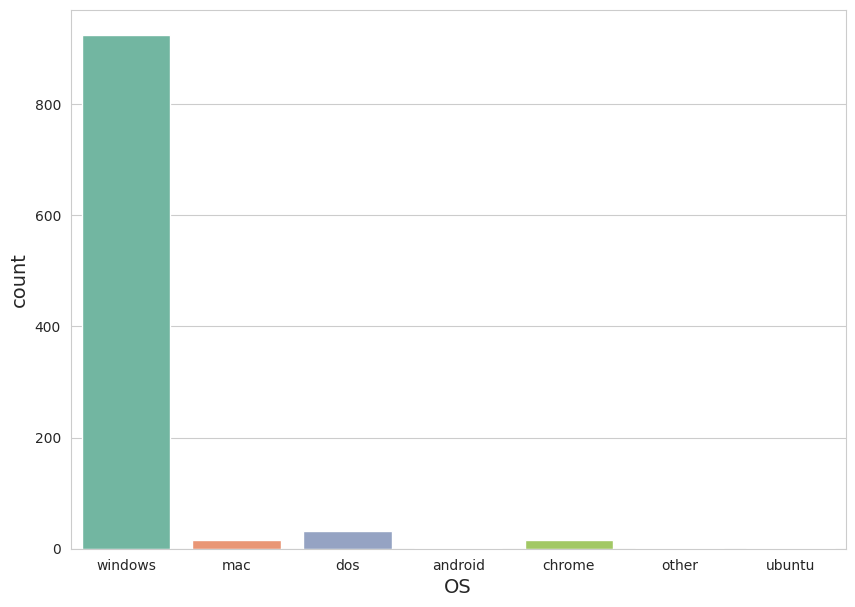

In [83]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='OS')
plt.xlabel('OS', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

In [84]:
os_stats = df.groupby('OS')['price'].agg(['mean', 'median']).reset_index().sort_values(by=['mean', 'median'],
                                                                                       ascending=[False, False])
os_stats

,OS,mean,median
3,mac,193875.333333,169900.0
6,windows,77707.967532,62550.0
5,ubuntu,47990.000000,47990.0
2,dos,42513.625000,44495.0
1,chrome,25606.687500,23490.5
0,android,14990.000000,14990.0
4,other,13845.500000,13845.5


In [85]:
# Let's explore the year_of_warranty column
df['year_of_warranty'].value_counts()

year_of_warranty
1                 900
2                  63
No information     18
3                  10
Name: count, dtype: int64

So we have got some effectively NULL values in here.

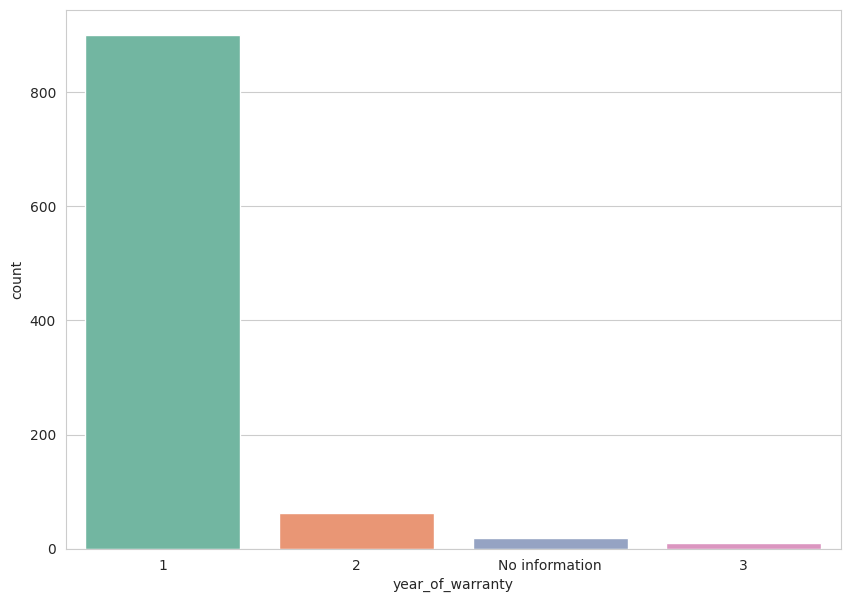

In [86]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='year_of_warranty')
plt.show()

In [87]:
warranty_stats = df.groupby('year_of_warranty')['price'].agg(['mean', 'median']).reset_index().sort_values(by=['mean', 'median'],
                                                                                                  ascending=[False, False])
warranty_stats

,year_of_warranty,mean,median
1,2,108679.444444,82990.0
2,3,98775.500000,82727.0
0,1,74957.256667,59990.0
3,No information,70834.166667,66565.0
